In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/belma/Documents/IRONHACK/Lessons/Week_5/Mid_bootcamp_project/Data/cleaned_data.csv")

#### Data exploration & Data pre-processing

#### To Do's
- Change data type in a column if needed 
- plot the correlations
- check the discrete and continious numerical columns
- plot the categorical colums Which are encoded
- check for outliners

In [3]:
data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04
mean,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.007610,0.235107,3.410784,7.662792,1791.170215,291.962418,1971.092997,84.793091,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,5.418614e+05
std,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.086903,0.767165,0.650035,1.171971,828.692965,442.875502,29.387141,402.574626,53.47748,0.138589,0.140791,685.537057,27345.621867,3.675569e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,3.249500e+05
50%,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,4.505500e+05
75%,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,6.450000e+05
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [4]:
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### Splitting the numerical columns into 2 dataframes, distinguishing between continious and discrete vaiues

#### cheking the quality / quantity in colums

In [5]:
for i in data:
    print('Column value: ', i)
    print(data[i].value_counts())
    print("\n")

Column value:  date
2014-06-23    142
2014-06-25    130
2014-06-26    127
2015-04-27    126
2015-03-25    123
             ... 
2015-01-31      1
2015-05-24      1
2014-08-03      1
2015-01-10      1
2014-07-27      1
Name: date, Length: 372, dtype: int64


Column value:  bedrooms
3     9732
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64


Column value:  bathrooms
2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


Column value:  sqft_living
1300    136
1440    133
1400    132
1660    128
1800    128
       ... 
2507      1
9890      1
5584     

##### from the counts i cannot define with a range, in which numeric column is meant to be discrete or continious, so I will define it manually 

In [6]:
df_cont = data[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]
df_dis = data [['bedrooms', 'bathrooms', 'floors' ]]

In [7]:
df_cont.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1340,5650,221900
1,2570,7242,2170,400,1690,7639,538000
2,770,10000,770,0,2720,8062,180000
3,1960,5000,1050,910,1360,5000,604000
4,1680,8080,1680,0,1800,7503,510000


In [8]:
df_cont.describe()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
count,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04
mean,2083.132633,1.512804e+04,1791.170215,291.962418,1988.384080,12775.718161,5.418614e+05
std,918.808412,4.153080e+04,828.692965,442.875502,685.537057,27345.621867,3.675569e+05
min,370.000000,5.200000e+02,370.000000,0.000000,399.000000,651.000000,7.800000e+04
25%,1430.000000,5.040000e+03,1200.000000,0.000000,1490.000000,5100.000000,3.249500e+05
50%,1920.000000,7.614000e+03,1560.000000,0.000000,1840.000000,7620.000000,4.505500e+05
75%,2550.000000,1.069050e+04,2220.000000,560.000000,2370.000000,10086.250000,6.450000e+05
max,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000,7.700000e+06


##### Its worth to plot  the  distribution of continious numerical data 

In [9]:
def create_displot(df):
    for i in df.columns:
        print(i)
        sns.displot(data[i])
        plt.show()

sqft_living


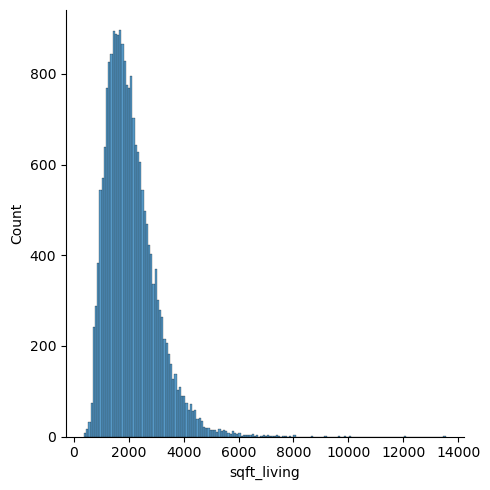

sqft_lot


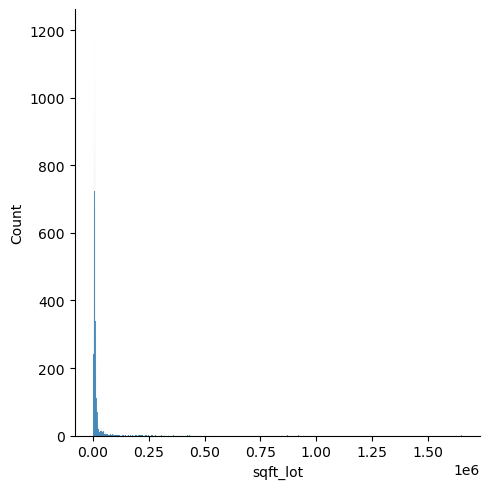

sqft_above


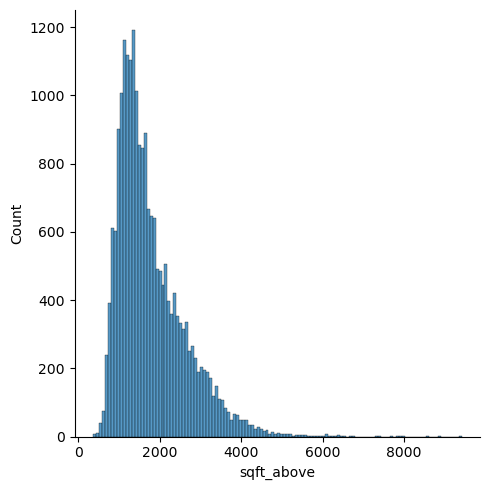

sqft_basement


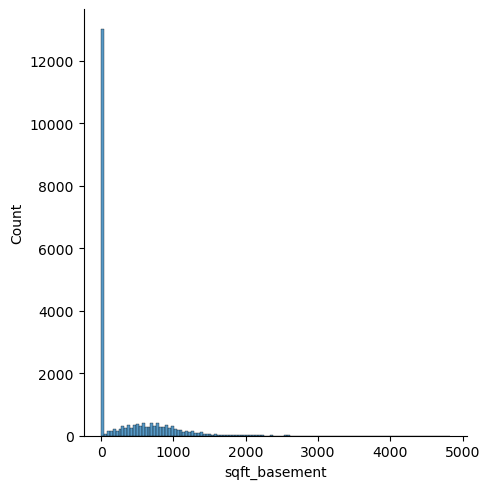

sqft_living15


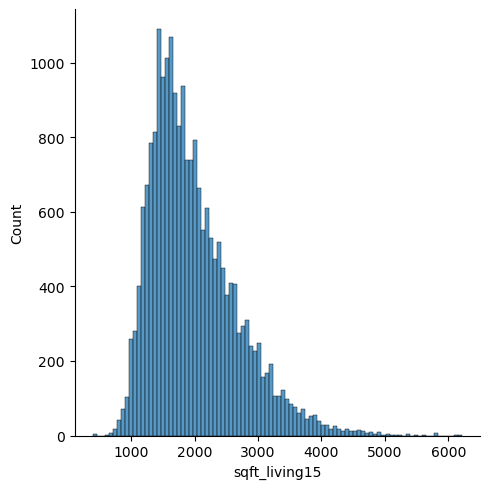

sqft_lot15


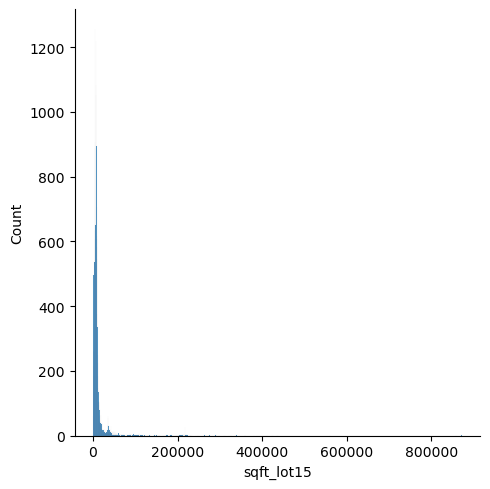

price


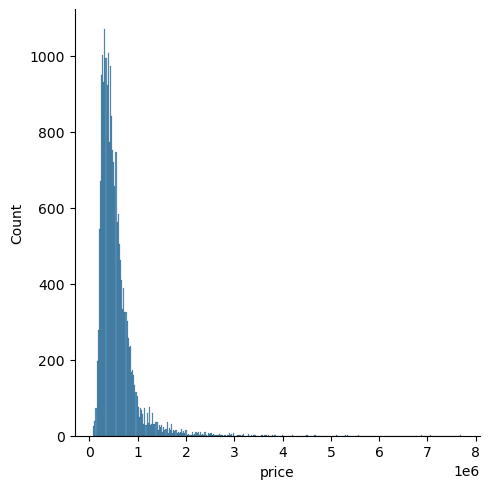

In [10]:
create_displot(df_cont)

### Checking Outliners 

In [11]:
def create_boxplot(df):
    for i in df.columns:
        sns.boxplot(x=i, data = df)
        plt.show()

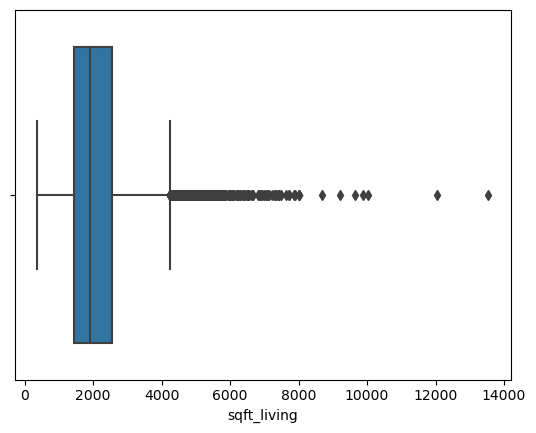

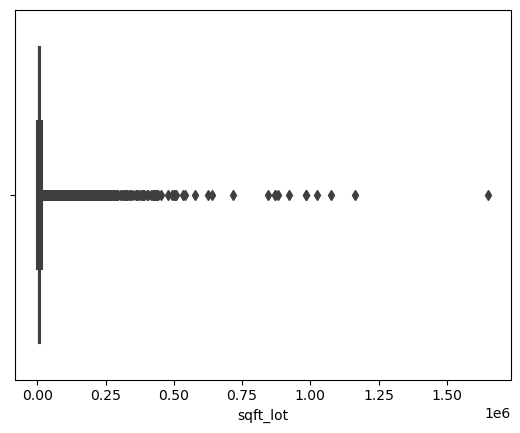

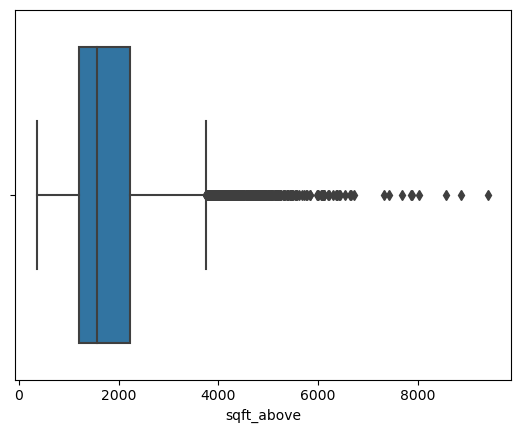

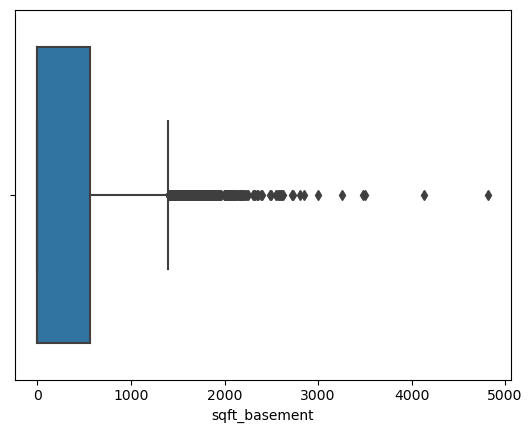

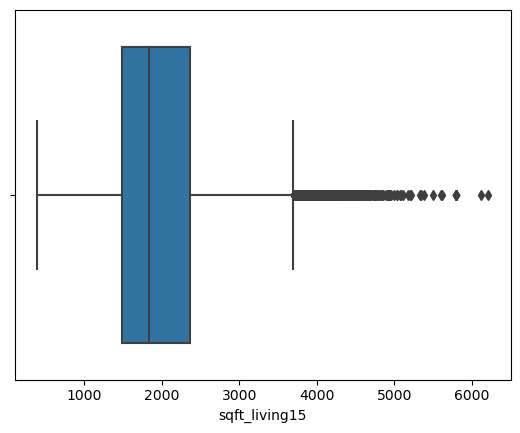

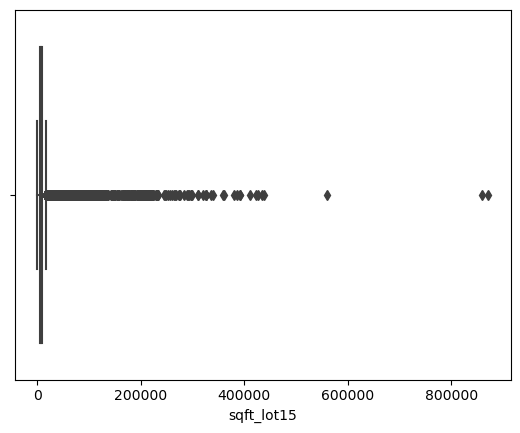

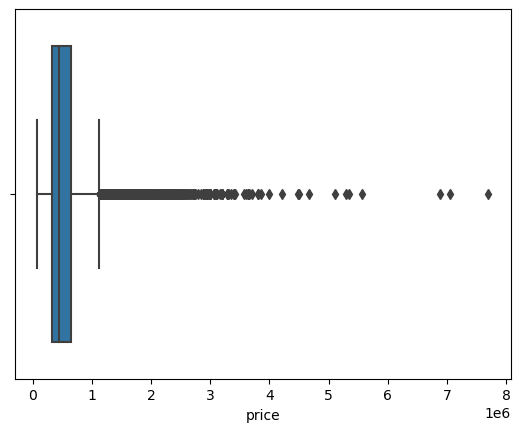

In [12]:
create_boxplot(df_cont)

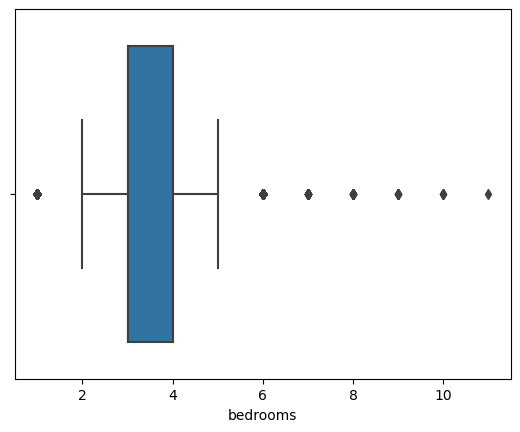

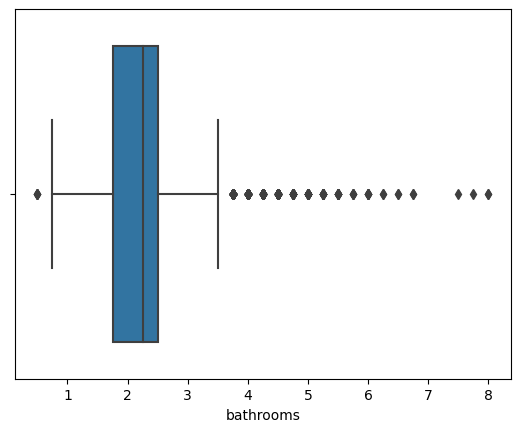

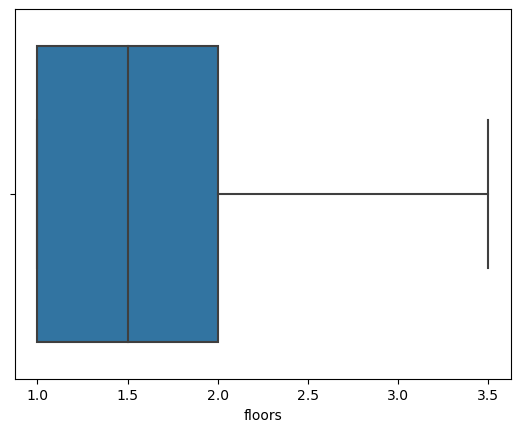

In [13]:
create_boxplot(df_dis)

#### This is relevant when a prediction model is planned. In the next step, the outliers need to be normalized replacedd or removed, to make the most accurate prediction model. 